# Anticipez les besoins en consommations de bâtiments

## Etape 1 : Réalisez une analyse exploratoire

### Ne pas oublier l'objectif qui est de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

### Import des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Analyse Exploratoire

##### J'importe mes données

In [2]:
building_consumption = pd.read_csv("Data/2016_Building_Energy_Benchmarking.csv")

##### On regarde comment un bâtiment est défini dans ce jeu de données 

In [3]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


##### Les informations générales de notre dataset

In [4]:
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

##### Description de mon dataset

In [5]:
building_consumption.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


* On constate de nombreuses colonnes numériques. On peut voir des valeurs catégorielles intéressantes pour la suite, du type YearBuilt, ZipCode, PropertyGFATotal etc. On voit aussi beaucoup de valeurs liées à l'énergie, il nous faudra en garder qu'une pour éviter le dataleakage.

##### Vérification des doublons dans le fichier.

In [6]:
building_consumption.duplicated(keep = False).any()

np.False_

* Pas de présence de doublons dans mon fichier.

#### Nombre de lignes et de colonnes dans mon jeu de données avant transformation

In [7]:
data_avant_transformation = building_consumption.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données avant transformation.


#### Nous avons bien uniquement l'année 2016 comme référence.

In [8]:
building_consumption['DataYear'].value_counts()

DataYear
2016    3376
Name: count, dtype: int64

### Recommendation 1 : Bien lire tout d’abord l'énoncé pour se restreindre uniquement aux types pertinents de bâtiments.

* Nous voulons l'ensemble des bâtiments que ne sont pas destinés à l'habitation.
* Commençons par regarder les colonnes intéressantes pour les déterminer : BuildingType / PrimaryPropertyType / LargestPropertyUseType

In [9]:
building_consumption['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [10]:
building_consumption['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Multifamily Housing                                     1667
Office                                                   498
Non-Refrigerated Warehouse                               199
K-12 School                                              139
Other                                                    102
Retail Store                                              99
Hotel                                                     77
Worship Facility                                          71
Distribution Center                                       54
Senior Care Community                                     46
Supermarket/Grocery Store                                 41
Medical Office                                            41
Parking                                                   32
Other - Recreation                                        31
Self-Storage Facility                                     28
College/University                                        25
R

In [11]:
building_consumption['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

#### On voit que l'on peut enlever déjà les valeurs contenant Multifamily dans BuildingType pour voir la répercussion aussi sur les autres catégories énoncées ci-dessus.

* On regarde le nombre de valeurs de Multifamily dans BuildingType

In [12]:
building_consumption['BuildingType'].str.contains("Multifamily").value_counts()

BuildingType
True     1708
False    1668
Name: count, dtype: int64

* On a déjà 1708 valeurs à enlever.

In [13]:
building_delete = ['Multifamily LR (1-4)','Multifamily MR (5-9)','Multifamily HR (10+)']

* On enregistre notre nouveau jeu sans les valeurs contenant Multifamily dans buildingType

In [14]:
building_clean = building_consumption[~building_consumption['BuildingType'].isin(building_delete)]
building_clean['BuildingType'].value_counts()

BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: count, dtype: int64

* Les valeurs sont bien enlevées.

* Petit récapitualif

In [15]:
building_clean_shape = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.


### Recommendation 2 : Identifier les colonnes qui peuvent aider à repérer des bâtiments aberrants ou peu pertinents.

#### On vérifie les types de bâtiments dans les autres rubriques énoncées. Avec ce travail de vérification on va identifier les colonnes de deuxième et de troisième de type de bâtiments qui va nous permettre d'écarter certanes valeurs.

In [16]:
building_clean['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: count, dtype: int64

* On constate une donnée liée à une habitation : Low-Rise Multifamily

In [17]:
building_clean.loc[building_clean['PrimaryPropertyType']=='Low-Rise Multifamily',:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
644,19445,2016,NonResidential,Low-Rise Multifamily,Pacific Pointe,2108 N Pacific St.,Seattle,WA,98103.0,0354000254,...,5.111956e+05,1744199.0,2529.819824,252982.0,False,NaN,Compliant,NaN,25.60,0.28
1300,21481,2016,Campus,Low-Rise Multifamily,Sanitary Market,1525 FIrst Avenue,Seattle,WA,98101.0,1976200210,...,1.107372e+06,3778355.0,0.000000,0.0,False,NaN,Compliant,NaN,26.34,0.58
2450,25674,2016,NonResidential,Low-Rise Multifamily,(ID25674) COMET TAVERN,916 E PIKE ST,Seattle,WA,98122.0,6003500480,...,3.332500e+03,11370.0,968.300171,96830.0,False,NaN,Non-Compliant,Low outlier,5.22,0.16


* On voit que c'est causé par une mauvaise notation de BuildingType. En regardant sur Google Maps les adresses, ils semblent que nous sommes face à des habitations, on peut donc les enlever. Avant cela on vérifie pour LargestPropertyUseType

#### Nous regardons les types de bâtiments pour LargestPropertyUseType

In [18]:
building_clean['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                                  497
Non-Refrigerated Warehouse                              199
K-12 School                                             139
Retail Store                                             99
Other                                                    98
Hotel                                                    76
Worship Facility                                         71
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
Senior Care Commu

* On constate une donnée liée à une habitation : Multifamily Housing

In [19]:
building_clean.loc[building_clean['LargestPropertyUseType']=='Multifamily Housing',['OSEBuildingID','PrimaryPropertyType']]

,OSEBuildingID,PrimaryPropertyType
164,264,Mixed Use Property
644,19445,Low-Rise Multifamily
1159,21122,Mixed Use Property
1300,21481,Low-Rise Multifamily
1839,23562,Mixed Use Property
2314,25222,Mixed Use Property
2394,25522,Mixed Use Property
2450,25674,Low-Rise Multifamily
2748,26834,Mixed Use Property
3003,27838,Mixed Use Property


* Dans cette situation on voit que dans LargestPropertyUseType, le PrimaryPropertyType est Mixed Use Property, ce qui indique que le batiment peut être une entreprise et une habitation par exemple. Alors on va prendre les catégories du deuxième et troisième type de bâtiment pour les identifier.

In [20]:
building_clean[
    (building_clean['PrimaryPropertyType'] == 'Mixed Use Property') &
    (
        (building_clean['LargestPropertyUseType'] == 'Multifamily Housing') |
        (building_clean['SecondLargestPropertyUseType'] == 'Multifamily Housing') |
        (building_clean['ThirdLargestPropertyUseType'] == 'Multifamily Housing')
    )
][['OSEBuildingID','LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']]

,OSEBuildingID,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
164,264,Multifamily Housing,Supermarket/Grocery Store,Parking
289,419,Retail Store,Other - Restaurant/Bar,Multifamily Housing
440,601,Retail Store,Parking,Multifamily Housing
488,657,Parking,Multifamily Housing,Hotel
541,731,Non-Refrigerated Warehouse,Multifamily Housing,Retail Store
612,817,Office,Parking,Multifamily Housing
912,20212,Retail Store,Multifamily Housing,Restaurant
1159,21122,Multifamily Housing,Office,Parking
1315,21506,Office,Multifamily Housing,Restaurant
1328,21533,Hotel,Parking,Multifamily Housing


* Ces données sont donc à exclure, je vais le faire grâce à leur OSEBuildingID

In [21]:
# J'enregistre les OSEBuildingID à exclure
suppr_donnees_un = building_clean.loc[building_clean['LargestPropertyUseType']=='Multifamily Housing','OSEBuildingID']
suppr_donnees_deux = building_clean[
    (building_clean['PrimaryPropertyType'] == 'Mixed Use Property') &
    (
        (building_clean['LargestPropertyUseType'] == 'Multifamily Housing') |
        (building_clean['SecondLargestPropertyUseType'] == 'Multifamily Housing') |
        (building_clean['ThirdLargestPropertyUseType'] == 'Multifamily Housing')
    )
]['OSEBuildingID']
# J'enregistre mon nouveau jeu de données
jeu_donnee = building_clean[~building_clean['OSEBuildingID'].isin(suppr_donnees_un)]
building_clean = jeu_donnee[~jeu_donnee['OSEBuildingID'].isin(suppr_donnees_deux)]
building_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1641 non-null   int64  
 1   DataYear                         1641 non-null   int64  
 2   BuildingType                     1641 non-null   object 
 3   PrimaryPropertyType              1641 non-null   object 
 4   PropertyName                     1641 non-null   object 
 5   Address                          1641 non-null   object 
 6   City                             1641 non-null   object 
 7   State                            1641 non-null   object 
 8   ZipCode                          1625 non-null   float64
 9   TaxParcelIdentificationNumber    1641 non-null   object 
 10  CouncilDistrictCode              1641 non-null   int64  
 11  Neighborhood                     1641 non-null   object 
 12  Latitude                 

* Petit récapitulatif

In [22]:
building_clean_shape_deux = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.


### Recommendation 3 : Il y a plusieurs colonnes candidates pouvant être une target de votre modèle. Il faut en choisir une pour tout le reste du projet.

#### Afin d'identifier notre target pour notre modèle, regardons ce que nous avons et définissons les :
* SteamUse(kBtu) : Consommation de vapeur (en kBtu).
* Electricity(kWh) : Consommation d’électricité en kilowattheures.
* Electricity(kBtu) : Même consommation que ci-dessus, convertie en kBtu.
* NaturalGas(therms) : Consommation de gaz naturel en therms.
* NaturalGas(kBtu) : Idem, convertie en kBtu.
* SiteEnergyUse(kBtu) : Consommation totale d’énergie livrée sur le site. C’est une somme de toutes les sources (élec, vapeur, gaz, etc).
* SourceEUI / SiteEUI : Consommation d’énergie normalisée par la surface. Pour comparer des bâtiments de taille différente.
* TotalGHGEmissions : Émissions totales de gaz à effet de serre liées à l’énergie consommée.
* GHGEmissionsIntensity : Émissions par unité de surface.
#### Au vu de ce que nous avons et pour répondre à la problématique, nous prenons SiteEnergyUse(kBtu) car cette variable donne la somme de toutes les sources d'énergies et pourra nous permettre aussi de recalculer les émissions si besoin. Il est d'autant plus important qu'il nous faut qu'une donnée et si nous prenons une seule source d'énergie il est possible que nous écartons un grand nombre de notre dataset.
#### Dans cette logique on peut supprimer déjà des colonnes qui sont redondantes d'un point de vu métier :
* Electricity(kWh) : une seule information suffit
* NaturalGas(therms) : une seule information suffit
* SourceEUI / SiteEUI : trop proche de notre target SiteEnergyUse(kBtu)
* TotalGHGEmissions : pourra être recalculé avec la target
* GHGEmissionsIntensity : pourra être recalculé avec la target
* SiteEnergyUseWN(kBtu) : même indicateur que notre target

In [23]:
colonnes_a_enlever = [
    'Electricity(kWh)', 'NaturalGas(therms)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)'
]
building_clean = building_clean.drop(columns = colonnes_a_enlever)
building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1641 non-null   int64  
 1   DataYear                         1641 non-null   int64  
 2   BuildingType                     1641 non-null   object 
 3   PrimaryPropertyType              1641 non-null   object 
 4   PropertyName                     1641 non-null   object 
 5   Address                          1641 non-null   object 
 6   City                             1641 non-null   object 
 7   State                            1641 non-null   object 
 8   ZipCode                          1625 non-null   float64
 9   TaxParcelIdentificationNumber    1641 non-null   object 
 10  CouncilDistrictCode              1641 non-null   int64  
 11  Neighborhood                     1641 non-null   object 
 12  Latitude                 

In [24]:
building_clean_shape_trois = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.


### Recommendation 4 : Le libellé et le contenu de certaines colonnes vous aidera à comprendre pourquoi certaines valeurs manquantes existent et ce que vous devez en faire.

#### Je regarde de nouveau les colonnes de mon dataframe mais en regardant la proportion de données manquantes

In [25]:
col_proportions_manquantes = building_clean.isnull().mean()
display(col_proportions_manquantes)

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.009750
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.001219
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.001219
LargestPropertyUseType             0.003656
LargestPropertyUseTypeGFA       

#### Les colonnes suivantes vont nous aider à traiter nos données grâce à leur intitulé :
* DefaultData
* ComplianceStatus
* Outlier : beaucoup de données manquantes mais va nous permettre d'identifier des données abérrantes
#### On remarque d'autres colonnes avec des données manquantes :
* La colonne YearsENERGYSTARCertified qui a 94% de données manquantes. La colonne contient les années où le bâtiment a obtenu une certification ENERGY STAR. La donnée pourrait être intéressante mais trop de valeur manquante n'est pas bon pour notre futur modèle. Elle est donc à supprimer.
* La colonne Comments n'a plus de données alors on la supprime.
* L'information ThirdLargestPropertyUseType, malgré les 80% de données manquantes on peut la garder pour le moment afin de savoir si il y a plusieurs bâtiments.
* On voit que NumberofBuildings / ListOfAllPropertyUseTypes / SiteEnergyUse(kBtu) / SteamUse(kBtu) / Electricity(kBtu) / NaturalGas(kBtu) ont le même nombre de valeurs manquantes. Potentiellement ce sont les mêmes données, à vérifier.
* On voit que ZipCode et ENERGYSTARScore ont des valeurs manquantes


#### On commence par regarder les données en DefaultData

In [26]:
building_clean.loc[building_clean['DefaultData'],'ComplianceStatus'].value_counts()

ComplianceStatus
Error - Correct Default Data    88
Name: count, dtype: int64

In [27]:
building_clean.loc[building_clean['DefaultData'],'DefaultData'].value_counts()

DefaultData
True    88
Name: count, dtype: int64

* Il se trouve que la colonne DefaultData corresponde à la colonne Compliance Status car les valeurs indiquées en erreur le sont aussi dans Compliance Status.

### On va donc se focaliser sur ComplianceStatus.

In [28]:
building_clean['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1522
Error - Correct Default Data      88
Non-Compliant                     17
Missing Data                      14
Name: count, dtype: int64

#### Checck des Error - Correct Default Data

In [29]:
building_clean.loc[building_clean['ComplianceStatus']=='Error - Correct Default Data']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,...,NaN,95.0,1.539478e+06,0.0,9.369550e+05,6.025230e+05,True,NaN,Error - Correct Default Data,NaN
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,...,NaN,75.0,6.779173e+06,0.0,1.947601e+06,4.831572e+06,True,NaN,Error - Correct Default Data,NaN
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,...,NaN,88.0,6.399128e+06,0.0,1.599684e+06,4.799443e+06,True,NaN,Error - Correct Default Data,NaN
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,...,NaN,61.0,6.456026e+06,0.0,2.262820e+06,4.193207e+06,True,NaN,Error - Correct Default Data,NaN
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,...,NaN,93.0,1.633399e+06,0.0,1.436416e+06,1.969830e+05,True,NaN,Error - Correct Default Data,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,27955,2016,SPS-District K-12,K-12 School,Montlake Elementary,2409 22nd Ave. E.,Seattle,WA,98112.0,6788200735,...,NaN,90.0,1.258619e+06,0.0,4.365350e+05,8.220840e+05,True,NaN,Error - Correct Default Data,NaN
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,...,NaN,84.0,4.959298e+06,0.0,3.004396e+06,1.954902e+06,True,NaN,Error - Correct Default Data,NaN
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,NaN,75.0,5.026677e+05,0.0,5.026678e+05,0.000000e+00,True,NaN,Error - Correct Default Data,NaN
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,NaN,93.0,3.878100e+05,0.0,2.775369e+05,1.102730e+05,True,NaN,Error - Correct Default Data,NaN


* Cela indique une erreur détectée, mais le système a corrigé automatiquement avec des données par défaut. Nous ne savons pas quelles données ont été remplacé, on peut donc les garder pour le moment et voir si des anomalies en ressortent plus tard.

#### Check des missing data

In [30]:
building_clean.loc[building_clean['ComplianceStatus']=='Missing Data']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,...,NaN,NaN,0.0,0.0,0.0,0.0,False,NaN,Missing Data,NaN
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,...,NaN,NaN,0.0,0.0,1496816.0,0.0,False,NaN,Missing Data,NaN
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,...,NaN,NaN,0.0,0.0,600813.0,0.0,False,NaN,Missing Data,NaN
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,...,NaN,NaN,0.0,0.0,1698176.0,0.0,False,NaN,Missing Data,NaN
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,...,NaN,NaN,0.0,0.0,2347138.0,0.0,False,NaN,Missing Data,NaN
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,...,NaN,NaN,0.0,0.0,2104286.0,0.0,False,NaN,Missing Data,NaN
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,...,NaN,NaN,0.0,0.0,0.0,4318917.0,False,NaN,Missing Data,NaN
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,...,NaN,NaN,0.0,0.0,0.0,3217877.0,False,NaN,Missing Data,NaN
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,...,NaN,NaN,0.0,0.0,0.0,0.0,False,NaN,Missing Data,NaN
614,820,2016,SPS-District K-12,K-12 School,Bailey Gatzert Elementary,1301 E. Yesler Way,Seattle,WA,98122.0,0007600137,...,NaN,NaN,0.0,0.0,1957268.0,0.0,False,NaN,Missing Data,NaN


* Effectivement on voit qu'ils manquent des données à plusieurs endroits par colonne. Ces données sont trop faussées pour les prendre en compte. Il faut les supprimer.

#### Check des Non-Compliant

In [31]:
building_clean.loc[building_clean['ComplianceStatus']=='Non-Compliant']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,...,NaN,NaN,4.139950e+07,0.0,39794668.0,1604831.0,False,NaN,Non-Compliant,High outlier
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,...,NaN,NaN,0.000000e+00,0.0,0.0,0.0,False,NaN,Non-Compliant,NaN
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,...,NaN,100.0,3.189628e+05,0.0,318963.0,0.0,False,NaN,Non-Compliant,Low outlier
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,...,NaN,100.0,1.119592e+07,0.0,1608768.0,343050.0,False,NaN,Non-Compliant,Low outlier
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,...,NaN,1.0,2.713719e+07,0.0,27137187.0,0.0,False,NaN,Non-Compliant,High outlier
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,...,NaN,NaN,2.410550e+04,0.0,24105.0,0.0,False,NaN,Non-Compliant,Low outlier
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.0,1976200060,...,NaN,NaN,4.429350e+04,0.0,44294.0,0.0,False,NaN,Non-Compliant,Low outlier
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.0,2858600090,...,NaN,100.0,1.008417e+05,0.0,100842.0,0.0,False,NaN,Non-Compliant,Low outlier
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,98133.0,3320000165,...,NaN,100.0,2.848573e+05,0.0,141784.0,143073.0,False,NaN,Non-Compliant,Low outlier


* Non-Compliant signifie que les règles de conformité ne sont pas respectées, et aucune correction automatique n’a été appliquée. On voit que sur les 17 données, 14 sont renseignés dans Outlier, on doit donc les regarder plus attentivement pour voir si il y a vraiment un soucis. Les 3 autres lignes sont à supprimer car on retrouve des NaN sur les données energétiques.

### Regardons maintenant la colonne Outlier

In [32]:
building_clean['Outlier'].value_counts()

Outlier
Low outlier     14
High outlier     2
Name: count, dtype: int64

In [33]:
building_clean.loc[building_clean['Outlier']=='Low outlier',:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,...,NaN,100.0,3.189628e+05,0.0,318963.0,0.0,False,NaN,Non-Compliant,Low outlier
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,...,NaN,100.0,1.119592e+07,0.0,1608768.0,343050.0,False,NaN,Non-Compliant,Low outlier
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,...,NaN,100.0,4.314717e+05,0.0,246628.0,184844.0,True,NaN,Error - Correct Default Data,Low outlier
1045,20617,2016,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,Seattle,WA,98134.0,1824049074,...,NaN,100.0,1.454688e+05,0.0,49005.0,96464.0,True,NaN,Error - Correct Default Data,Low outlier
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,...,NaN,NaN,2.410550e+04,0.0,24105.0,0.0,False,NaN,Non-Compliant,Low outlier
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.0,1976200060,...,NaN,NaN,4.429350e+04,0.0,44294.0,0.0,False,NaN,Non-Compliant,Low outlier
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.0,2858600090,...,NaN,100.0,1.008417e+05,0.0,100842.0,0.0,False,NaN,Non-Compliant,Low outlier
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,98133.0,3320000165,...,NaN,100.0,2.848573e+05,0.0,141784.0,143073.0,False,NaN,Non-Compliant,Low outlier
2129,24547,2016,NonResidential,K-12 School,Islamic School of Seattle,720 25TH AVE,Seattle,WA,98122.0,6840700175,...,NaN,100.0,1.613634e+05,0.0,161363.0,0.0,False,NaN,Non-Compliant,Low outlier
2189,24717,2016,NonResidential,Other,1701 First Ave South LLC,1701 First Ave South,Seattle,WA,98134.0,7666207085,...,NaN,NaN,1.680890e+04,0.0,16809.0,0.0,False,NaN,Non-Compliant,Low outlier


In [34]:
building_clean.loc[building_clean['Outlier']=='High outlier',:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,...,NaN,NaN,41399504.0,0.0,39794668.0,1604831.0,False,NaN,Non-Compliant,High outlier
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,...,NaN,1.0,27137190.0,0.0,27137187.0,0.0,False,NaN,Non-Compliant,High outlier


* Nous ne savons pas  si elles sont vraiment abérrantes, donc nous analyserons les outliers avec des graphiques et nous les comparerons avec les outliers identifiés ici, je les enregistre donc dans une liste.

In [35]:
low_outliers = building_clean.loc[building_clean['Outlier'] == 'Low outlier', 'OSEBuildingID'].tolist()
high_outliers = building_clean.loc[building_clean['Outlier'] == 'High outlier', 'OSEBuildingID'].tolist()

#### Check des valeurs manquantes de SiteEnergyUse

In [36]:
building_clean.loc[building_clean['SiteEnergyUse(kBtu)']==0,:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,...,NaN,NaN,0.0,0.0,0.0,0.0,False,NaN,Missing Data,NaN
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,...,NaN,NaN,0.0,0.0,1496816.0,0.0,False,NaN,Missing Data,NaN
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,...,NaN,NaN,0.0,0.0,600813.0,0.0,False,NaN,Missing Data,NaN
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,...,NaN,NaN,0.0,0.0,1698176.0,0.0,False,NaN,Missing Data,NaN
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,...,NaN,NaN,0.0,0.0,2347138.0,0.0,False,NaN,Missing Data,NaN
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,...,NaN,NaN,0.0,0.0,2104286.0,0.0,False,NaN,Missing Data,NaN
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,...,NaN,NaN,0.0,0.0,0.0,4318917.0,False,NaN,Missing Data,NaN
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,...,NaN,NaN,0.0,0.0,0.0,3217877.0,False,NaN,Missing Data,NaN
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,...,NaN,NaN,0.0,0.0,0.0,0.0,False,NaN,Missing Data,NaN
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,...,NaN,NaN,0.0,0.0,0.0,0.0,False,NaN,Non-Compliant,NaN


* On remarque que sur les 16 valeurs manquantes, seulement 2 ne se retrouvent pas en Missing Data. On va pouvoir en traiter déjà une bonne partie ci-dessous

#### Suppression des éléments identifiés

* Elements à enlever dans ComplianceStatus : Missing Data

In [37]:
data_non_conforme = building_clean.loc[building_clean['ComplianceStatus']=='Missing Data','OSEBuildingID']
building_clean = building_clean[~building_clean['OSEBuildingID'].isin(data_non_conforme)]
building_clean['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1522
Error - Correct Default Data      88
Non-Compliant                     17
Name: count, dtype: int64

* Elements à enlever dans ComplianceStatus, les 3 valeurs sans données dans Non-Compliant : leurs OSEBuildingID sont 435 / 773 et 26532

In [38]:
NaN_Compliant = [435,773,26532]
building_clean = building_clean[~building_clean['OSEBuildingID'].isin(NaN_Compliant)]
building_clean['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1522
Error - Correct Default Data      88
Non-Compliant                     14
Name: count, dtype: int64

* Colonnes à enlever

In [39]:
colonnes_a_enlever_deux = [
    'YearsENERGYSTARCertified','Comments',
    'DefaultData']
building_clean = building_clean.drop(columns = colonnes_a_enlever_deux)

* Petit check si il reste des valeurs à 0 pour notre target

In [40]:
building_clean.loc[building_clean['SiteEnergyUse(kBtu)']==0,:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier
1361,21616,2016,SPS-District K-12,K-12 School,Olympic Hills Elementary,13018 20th Ave. N.E.,Seattle,WA,98125.0,2126049041,...,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,Error - Correct Default Data,NaN


* Il n'y a aucune valeur en terme de sources d'energie donc nous ne pouvons pas remplacer la valeur de notre target, on peut supprimer cette ligne.

In [41]:
data_valeur_manquante = building_clean.loc[building_clean['OSEBuildingID']==21616,'OSEBuildingID']
building_clean = building_clean[~building_clean['OSEBuildingID'].isin(data_valeur_manquante)]
building_clean.loc[building_clean['SiteEnergyUse(kBtu)']==0,:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier


In [105]:
building_clean_shape_quatre = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_quatre[0],'lignes et nous avons',building_clean_shape_quatre[1],'colonnes après la suppression de données identifiées comme non utilisables.')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1623 lignes et nous avons 34 colonnes après la suppression de données identifiées comme non utilisables.


#### Check des valeurs manquantes

In [42]:
building_clean.isnull().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.009858
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.002465
LargestPropertyUseTypeGFA       

#### Check des valeurs manquantes pour les ZipCode

In [43]:
building_clean.loc[building_clean['ZipCode'].isnull(),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier
3360,50196,2016,Nonresidential COS,Mixed Use Property,Northgate Community Center,10510 5th Ave NE,Seattle,WA,NaN,2926049431,...,8577.0,Pre-school/Daycare,1364.0,NaN,6.369655e+05,0.0,6.369655e+05,0.000000e+00,Compliant,NaN
3361,50198,2016,Nonresidential COS,Other,Fire Station 06 (New),405 MLK Jr Way S,Seattle,WA,NaN,1250200565,...,NaN,NaN,NaN,NaN,8.510538e+05,0.0,3.472887e+05,5.037650e+05,Compliant,NaN
3362,50201,2016,Nonresidential COS,Other,Fire Station 35 (New),8729 15th Ave NW,Seattle,WA,NaN,3300700810,...,NaN,NaN,NaN,NaN,7.834230e+05,0.0,4.032431e+05,3.801800e+05,Compliant,NaN
3363,50204,2016,Nonresidential COS,Other,Fire Station 39 (New),2806 NE 127th St,Seattle,WA,NaN,3834500066,...,NaN,NaN,NaN,NaN,6.456654e+05,0.0,4.317954e+05,2.138700e+05,Compliant,NaN
3364,50207,2016,Nonresidential COS,Other,Ballard Community Center,6020 28th ave NW,Seattle,WA,NaN,6658000065,...,7014.0,Pre-school/Daycare,535.0,NaN,9.366165e+05,0.0,5.421344e+05,3.944820e+05,Compliant,NaN
3365,50208,2016,Nonresidential COS,Other,Ballard Pool,1471 NW 67th St,Seattle,WA,NaN,3050700005,...,1670.0,Office,187.0,NaN,5.117308e+06,0.0,1.205173e+06,3.912135e+06,Compliant,NaN
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,NaN,NaN,NaN,75.0,5.026677e+05,0.0,5.026678e+05,0.000000e+00,Error - Correct Default Data,NaN
3367,50212,2016,Nonresidential COS,Other,Conservatory Campus,1400 E Galer St,Seattle,WA,NaN,2925049087,...,NaN,NaN,NaN,NaN,5.976246e+06,0.0,1.260870e+06,4.715376e+06,Compliant,NaN
3368,50219,2016,Nonresidential COS,Mixed Use Property,Garfield Community Center,2323 East Cherry St,Seattle,WA,NaN,7544800245,...,7726.0,Office,3779.0,NaN,1.813404e+06,0.0,7.694531e+05,1.043951e+06,Compliant,NaN
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,NaN,NaN,NaN,93.0,3.878100e+05,0.0,2.775369e+05,1.102730e+05,Error - Correct Default Data,NaN


* On peut retrouver leur code postaux grâce à Google Maps et les mettre à jour

In [44]:
building_clean.loc[building_clean['OSEBuildingID'] == 50196, 'ZipCode'] = 98125.0
building_clean.loc[building_clean['OSEBuildingID'] == 50198, 'ZipCode'] = 98144.0
building_clean.loc[building_clean['OSEBuildingID'] == 50201, 'ZipCode'] = 98117.0
building_clean.loc[building_clean['OSEBuildingID'] == 50204, 'ZipCode'] = 98125.0
building_clean.loc[building_clean['OSEBuildingID'] == 50207, 'ZipCode'] = 98107.0
building_clean.loc[building_clean['OSEBuildingID'] == 50208, 'ZipCode'] = 98117.0
building_clean.loc[building_clean['OSEBuildingID'] == 50210, 'ZipCode'] = 98119.0
building_clean.loc[building_clean['OSEBuildingID'] == 50212, 'ZipCode'] = 98112.0
building_clean.loc[building_clean['OSEBuildingID'] == 50219, 'ZipCode'] = 98122.0
building_clean.loc[building_clean['OSEBuildingID'] == 50220, 'ZipCode'] = 98118.0
building_clean.loc[building_clean['OSEBuildingID'] == 50221, 'ZipCode'] = 98126.0
building_clean.loc[building_clean['OSEBuildingID'] == 50222, 'ZipCode'] = 98108.0
building_clean.loc[building_clean['OSEBuildingID'] == 50223, 'ZipCode'] = 98104.0
building_clean.loc[building_clean['OSEBuildingID'] == 50224, 'ZipCode'] = 98119.0
building_clean.loc[building_clean['OSEBuildingID'] == 50225, 'ZipCode'] = 98108.0
building_clean.loc[building_clean['OSEBuildingID'] == 50226, 'ZipCode'] = 98108.0


In [45]:
building_clean.loc[building_clean['ZipCode'].isnull(),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier


* Traitement des codes postaux à jour.

#### On se rend compte que les codes postaux sont en float, on peut les transformer en chaîne de caractères pour plus de cohérence.

In [46]:
building_clean['ZipCode'] = building_clean['ZipCode'].astype(str)

* Les ZipCode sont bien en entier désormais

### Recommendation 5 : Bien choisir le type de graphique en fonction des features que vous voulez comparer (quanti vs quanti, quanti vs quali, quali vs quali, etc.).

#### Graphique des bâtiments les plus représentés et leurs consommations énergétiques (dans la catégorie du LargestPropertyUseType)

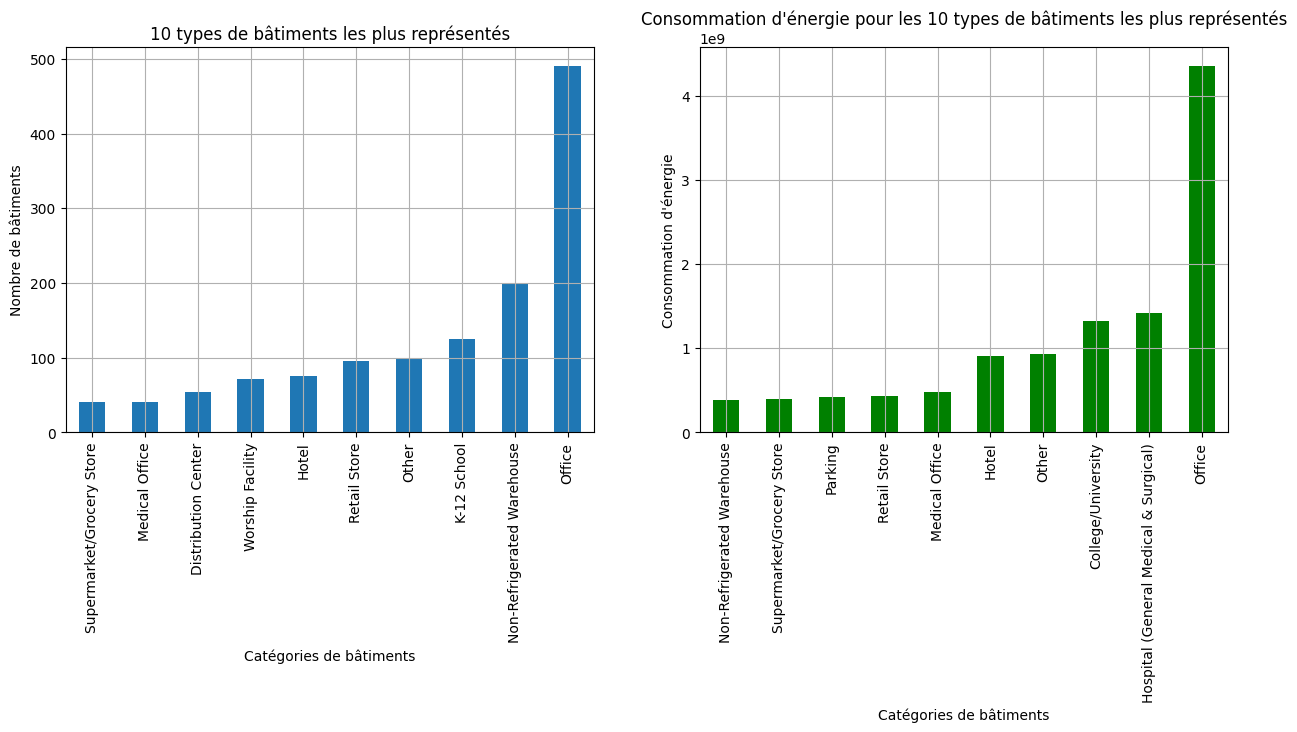

In [47]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

largest_property_graph = building_clean['LargestPropertyUseType'].value_counts().nlargest(10).sort_values()
plt.subplot(1,2,1)
largest_property_graph.plot(kind = 'bar')
plt.title("10 types de bâtiments les plus représentés")
plt.xlabel("Catégories de bâtiments")
plt.ylabel("Nombre de bâtiments")
plt.grid()

largest_property_graph_2 = building_clean.groupby('LargestPropertyUseType')['SiteEnergyUse(kBtu)'].sum()
largest_property_graph_2 = largest_property_graph_2.nlargest(10).sort_values()
plt.subplot(1,2,2)
largest_property_graph_2.plot(kind = 'bar', color='green')
plt.title("Consommation d'énergie pour les 10 types de bâtiments les plus représentés")
plt.xlabel("Catégories de bâtiments")
plt.ylabel("Consommation d'énergie")
plt.grid()


plt.tight_layout
plt.show()

* En tête nous avons les bâtiments pour les entreprises et les entrepôts qui dominent ce classement, notamment les bureaux d'entreprise.
* En termes de consommation d'énergie, on retrouve les bureaux d'entreprise mais on voit apparaître les hôpitaux et les centres médicaux alors qu'ils ne sont pas représentés dans le top des grands nombres de bâtiment.

#### Graphique en camembert représentant la principale activité du bâtiment en fonction de sa consommation énergétique

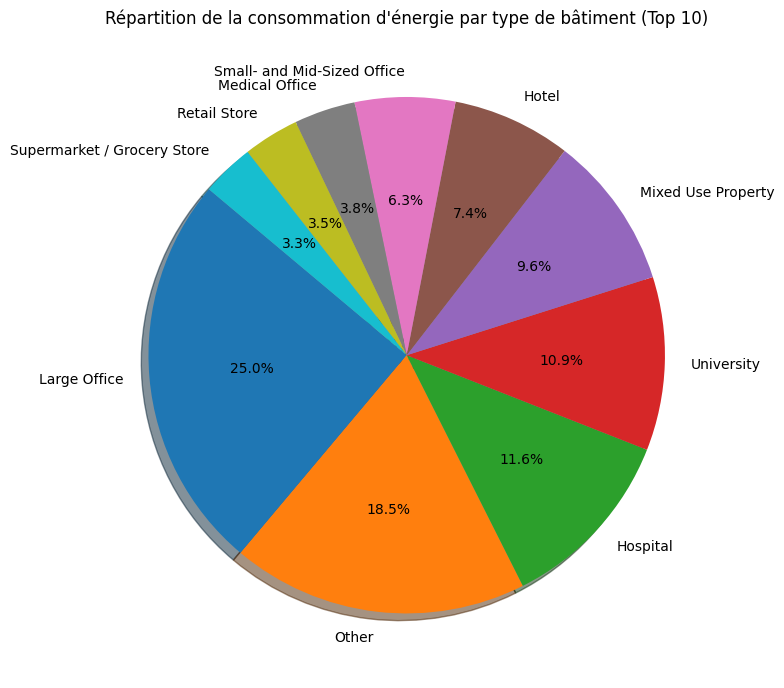

In [48]:
primary_property_graph = building_clean.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].sum()
primary_property_graph = primary_property_graph.sort_values(ascending=False)
primary_property_graph = primary_property_graph.head(10)
plt.figure(figsize=(8, 8))
primary_property_graph.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    ylabel=''
)
plt.title("Répartition de la consommation d'énergie par type de bâtiment (Top 10)")
plt.tight_layout()
plt.show()

* Ce sont encore les bureaux en premier mais en deuxième nous avons la catégorie Other.

#### Relation entre notre target et quelques variables pertinentes
* Utilisation totale d'énergie vs nombre d'étages
* Utilisation totale d'énergie vs l'année de construction

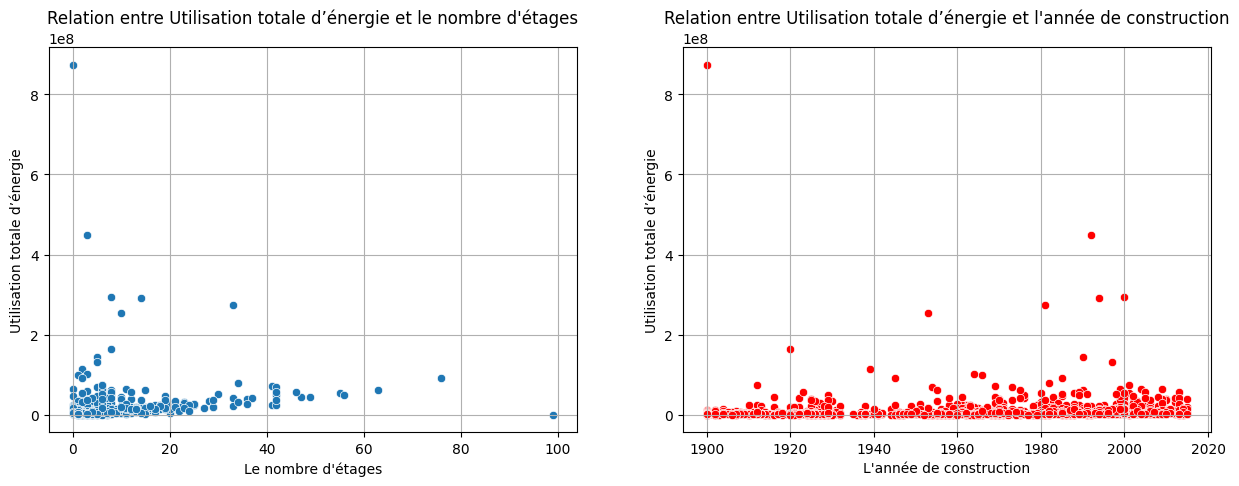

In [49]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = building_clean['NumberofFloors'], y = building_clean['SiteEnergyUse(kBtu)'])
plt.title("Relation entre Utilisation totale d’énergie et le nombre d'étages")
plt.xlabel("Le nombre d'étages")
plt.ylabel("Utilisation totale d’énergie")
plt.grid(True)

plt.subplot(1,2,2)
sns.scatterplot(x = building_clean['YearBuilt'], y = building_clean['SiteEnergyUse(kBtu)'], color = 'red')
plt.title("Relation entre Utilisation totale d’énergie et l'année de construction")
plt.xlabel("L'année de construction")
plt.ylabel("Utilisation totale d’énergie")
plt.grid(True)

plt.show()

* Avec ces 2 graphiques, on constate que nous ne sommes pas dans une relation linéaire. On voit que nous aurons des valeurs à regarder de plus près car on peut voir des valeurs abérrantes ou extrêmes.
* Nous sommes assez surpris par ces graphiques, la consommation totale d'énergie na varie pas tant en fonction de l'année de construction. Alors qu'on aurait plus penser que des anciens bâtiments consomment plus. La relation nombre d'étages et consommation d'énergie est un peu moins concentrée.

#### En voulant réaliser un graphique par quartier j'ai remarqué des erreurs de formatage de certains noms indiquant le même quartier mais en majuscule et minuscule alors par défaut on a l'impression que ce n'est pas les mêmes quartiers. 
* Nous devons traiter les éléments suivants pour plus de cohérence :
* North en NORTH
* Delridge et DELRIDGE NEIGHBORHOODS en DELRIDGE
* ballard en BALLARD
* Northwest en NORTHWEST
* Central en CENTRAL
* On change la mise en forme de MAGNOLIA / QUEEN ANNE en MAGNOLIA_QUEENANNE
* On change la mise en forme de GREATER DUWAMISH en GREATER_DUWAMISH


In [50]:
building_clean['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'Ballard',
       'DELRIDGE', 'North', 'Delridge', 'Northwest', 'Central',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [51]:
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('North', 'NORTH')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('Delridge', 'DELRIDGE')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('Ballard', 'BALLARD')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('Northwest', 'NORTHWEST')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('Central', 'CENTRAL')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('MAGNOLIA / QUEEN ANNE', 'MAGNOLIA_QUEENANNE')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('GREATER DUWAMISH', 'GREATER_DUWAMISH')
building_clean['Neighborhood'] = building_clean['Neighborhood'].replace('LAKE UNION', 'LAKE_UNION')

building_clean['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE_UNION', 'GREATER_DUWAMISH', 'MAGNOLIA_QUEENANNE', 'BALLARD',
       'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

* On a traité correctement les quartiers en les uniformisants

#### Evolution du nombre de bâtiments et consommation d'énergie par quartier

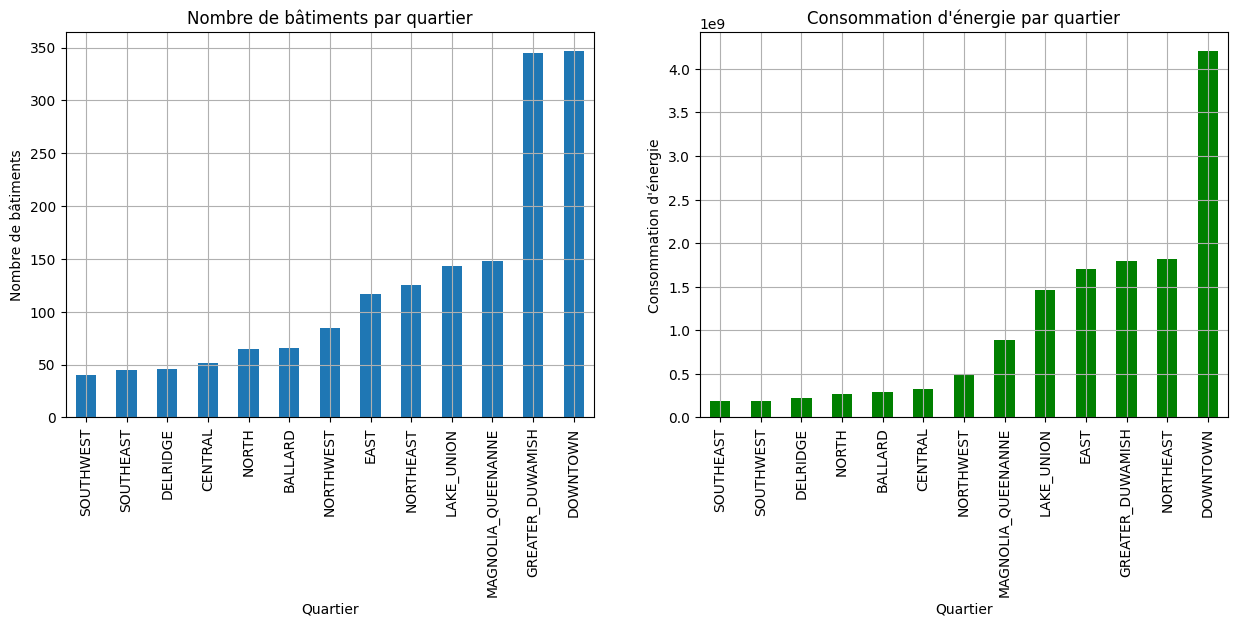

In [53]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

graph_quartier = building_clean['Neighborhood'].value_counts()
graph_quartier = graph_quartier.sort_values()
plt.subplot(1,2,1)
graph_quartier.plot(kind='bar')
plt.title('Nombre de bâtiments par quartier')
plt.xlabel('Quartier')
plt.ylabel('Nombre de bâtiments')
plt.grid()

plt.subplot(1,2,2)
graph_quartier_2 = building_clean.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].sum()
graph_quartier_2 = graph_quartier_2.sort_values()
graph_quartier_2.plot(kind='bar', color='green')
plt.title("Consommation d'énergie par quartier")
plt.xlabel('Quartier')
plt.ylabel("Consommation d'énergie")
plt.grid()

plt.tight_layout
plt.show()

* Le quartier de Downtown domine le nombre de bâtiment et également celui de la consommation d'énergie. Une valeur intéressante est celle de Greater Duwamish où sa consommation est elevé par rapport au nombre de bâtiment présent.

#### Toujours dans les visualisations. Afin de mettre en avant les bâtiments à mono ou multi usage, on va créer une nouvelle colonne.

* Règles de gestion pour les identifier

In [54]:
import numpy as np

conditions = [
    (building_clean['BuildingType'].notnull() &
     building_clean['SecondLargestPropertyUseType'].isnull() &
     building_clean['ThirdLargestPropertyUseType'].isnull()),

    (building_clean['BuildingType'].notnull() &
     building_clean['SecondLargestPropertyUseType'].notnull() &
     building_clean['ThirdLargestPropertyUseType'].isnull()),

    (building_clean['BuildingType'].notnull() &
     building_clean['SecondLargestPropertyUseType'].notnull() &
     building_clean['ThirdLargestPropertyUseType'].notnull())
]

choix = ['Mono_usage', 'Multi_usage', 'Multi_usage']

building_clean['UsageType'] = np.select(conditions, choix, default='Non_défini')

* Vérification du script

In [55]:
building_clean['UsageType'].value_counts()

UsageType
Multi_usage    828
Mono_usage     795
Name: count, dtype: int64

#### Graphique en camembert de la consommation d'énergie par type de bâtiment (mono ou multi usage)

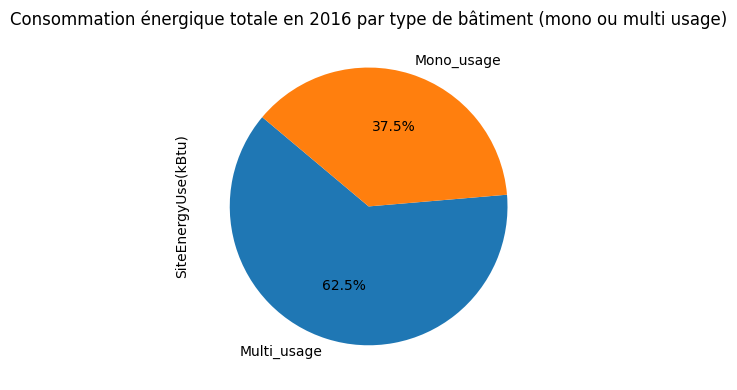

In [56]:
graphique_batiments_test = building_clean.groupby('UsageType')['SiteEnergyUse(kBtu)'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
graphique_batiments_test.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Consommation énergique totale en 2016 par type de bâtiment (mono ou multi usage)')
plt.tight_layout()

* Logiquement la part de consommation des bâtiments à multi usage est plus élevée.

* Petit récapitulatif

In [57]:
building_clean_shape_quatre = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_quatre[0],'lignes et nous avons',building_clean_shape_quatre[1],'colonnes après la suppression de données identifiées comme non utilisables.')

print('Nous avons réduit notre jeu de',data_avant_transformation[0]-building_clean_shape_quatre[0],'lignes et de',data_avant_transformation[1]-building_clean_shape_quatre[1],'colonnes')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1623 lignes et nous avons 35 colonnes après la suppression de données identifiées comme non utilisables.
Nous avons réduit notre jeu de 1753 lignes et de 11 colonnes


### Recommendation 6 : Identifier et supprimer des bâtiments avec des valeurs de features incohérentes.

#### Pour réaliser cette demande nous allons réaliser des boxplots et un pairplot

Je regarde de nouveau mes colonnes pour en profiter de faire un dernier tri avant de regarder plus en détail nos données
* PropertyName : pas d'utilité pour le modèle de connaître le nom des propriétaires
* Address : pas besoin d'avoir l'adresse exacte, trop compliqué à modéliser, nous avons déjà ZipCode et les données de géolocalisation
* City : une seule ville ici donc pas besoin
* State : un état représenté donc pas besoin
* TaxParcelIdentificationNumber : identifiant unique, pas d'utilité ici
* SecondLargestPropertyUseType : intéressant mais avec la colonne multi usage on peut les identifier
* ThirdLargestPropertyUseType : intéressant mais avec la colonne multi usage on peut les identifier
* ENERGYSTARScore : est un outil intéressant mais il y a beaucoup de données manquantes, risquent de fausser le modèle. Cet indicateur étant calculé à partir de la consommation cela aurait aussi causé un data leakage.

In [58]:
building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, 0 to 3375
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1623 non-null   int64  
 1   DataYear                         1623 non-null   int64  
 2   BuildingType                     1623 non-null   object 
 3   PrimaryPropertyType              1623 non-null   object 
 4   PropertyName                     1623 non-null   object 
 5   Address                          1623 non-null   object 
 6   City                             1623 non-null   object 
 7   State                            1623 non-null   object 
 8   ZipCode                          1623 non-null   object 
 9   TaxParcelIdentificationNumber    1623 non-null   object 
 10  CouncilDistrictCode              1623 non-null   int64  
 11  Neighborhood                     1623 non-null   object 
 12  Latitude                 

Suppression des colonnes indiqués ci-dessus

In [59]:
colonnes_a_enlever_deux = [
    'PropertyName','Address','City','State','TaxParcelIdentificationNumber',
    'ENERGYSTARScore','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
    ]
building_clean = building_clean.drop(columns = colonnes_a_enlever_deux)
building_clean.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,UsageType
0,1,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,...,88434.0,NaN,NaN,7226362.5,2003882.00,3946027.0,1276453.0,Compliant,NaN,Mono_usage
1,2,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,...,83880.0,15064.0,4622.0,8387933.0,0.00,3242851.0,5145082.0,Compliant,NaN,Multi_usage
2,3,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,...,756493.0,NaN,NaN,72587024.0,21566554.00,49526664.0,1493800.0,Compliant,NaN,Mono_usage
3,5,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,...,61320.0,NaN,NaN,6794584.0,2214446.25,2768924.0,1811213.0,Compliant,NaN,Mono_usage
4,8,2016,NonResidential,Hotel,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,...,123445.0,68009.0,0.0,14172606.0,0.00,5368607.0,8803998.0,Compliant,NaN,Multi_usage


Petit récapitulatif

In [62]:
building_clean_shape_cinq = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_quatre[0],'lignes et nous avons',building_clean_shape_quatre[1],'colonnes après la suppression de données identifiées comme non utilisables.')
print('Nous retrouvons',building_clean_shape_cinq[0],'lignes et nous avons',building_clean_shape_cinq[1],'colonnes après la suppression de colonnes non utilisées.')

print('Nous avons réduit notre jeu de',data_avant_transformation[0]-building_clean_shape_cinq[0],'lignes et de',data_avant_transformation[1]-building_clean_shape_cinq[1],'colonnes')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1623 lignes et nous avons 35 colonnes après la suppression de données identifiées comme non utilisables.
Nous retrouvons 1623 lignes et nous avons 27 colonnes après la suppression de colonnes non utilisées.
Nous avons réduit notre jeu de 1753 lignes et de 19 colonnes


### Création des boxplot

In [63]:
building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1623 non-null   int64  
 1   DataYear                         1623 non-null   int64  
 2   BuildingType                     1623 non-null   object 
 3   PrimaryPropertyType              1623 non-null   object 
 4   ZipCode                          1623 non-null   object 
 5   CouncilDistrictCode              1623 non-null   int64  
 6   Neighborhood                     1623 non-null   object 
 7   Latitude                         1623 non-null   float64
 8   Longitude                        1623 non-null   float64
 9   YearBuilt                        1623 non-null   int64  
 10  NumberofBuildings                1623 non-null   float64
 11  NumberofFloors                   1623 non-null   int64  
 12  PropertyGFATotal         

#### Boxplot interactif - SiteEnergyUse(kBtu) selon BuildingType

In [64]:
import plotly.express as px
import plotly.io as pio
from IPython.display import Image, display

fig1 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='BuildingType',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon BuildingType",
        orientation='h',
        points='outliers',
        color='BuildingType',
        hover_data=['OSEBuildingID']
    )
fig1.update_layout(height=500)
pio.write_image(fig1, "boxplot_buildingtype.png")

![Boxplot - BuildingType](boxplot_buildingtype.png)

* Identification des outliers par leur OSEBuildingID en fonction de leur consommation d'énergie et du BuildingType : [43, 49967, 198, 753, 828, 276]

#### Boxplot interactif - SiteEnergyUse(kBtu) selon PrimaryPropertyType

In [65]:
fig2 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='PrimaryPropertyType',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon PrimaryPropertyType",
        orientation='h',
        points='outliers',
        color='PrimaryPropertyType',
        hover_data=['OSEBuildingID']
    )
fig2.update_layout(height=500)
pio.write_image(fig2, "boxplot_primarypropertytype.png")

![Boxplot - PrimaryPropertyType](boxplot_primarypropertytype.png)


* Identification des outliers par leur OSEBuildingID en fonction de leur consommation d'énergie et du PrimaryPropertyType : [49967, 43, 753]

#### Boxplot interactif - SiteEnergyUse(kBtu) selon Neighborhood

In [66]:
fig3 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='Neighborhood',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon Neighborhood",
        orientation='h',
        points='outliers',
        color='Neighborhood',
        hover_data=['OSEBuildingID']
    )
fig3.update_layout(height=500)
pio.write_image(fig3, "boxplot_neighborhood.png")

![Boxplot - Neighborhood](boxplot_neighborhood.png)

* Identification des outliers par leur OSEBuildingID en fonction de leur consommation d'énergie et du Neighborhood : [43, 49967, 198, 753, 828, 276]

#### Boxplot interactif - SiteEnergyUse(kBtu) selon ComplianceStatus

In [67]:
fig4 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='ComplianceStatus',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon ComplianceStatus",
        orientation='h',
        points='outliers',
        color='ComplianceStatus',
        hover_data=['OSEBuildingID']
    )
fig4.update_layout(height=500)
pio.write_image(fig4, "boxplot_compliancestatus.png")

![Boxplot - ComplianceStatus](boxplot_compliancestatus.png)

* Identification des outliers par leur OSEBuildingID en fonction de leur consommation d'énergie et du ComplianceStatus : [43, 49967, 198, 753, 828, 276]

#### Boxplot interactif - SiteEnergyUse(kBtu) selon NumberofFloors

In [68]:
fig5 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='NumberofFloors',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon NumberofFloors",
        orientation='h',
        points='outliers',
        color='NumberofFloors',
        hover_data=['OSEBuildingID']
    )
fig5.update_layout(height=500)
pio.write_image(fig5, "boxplot_numberoffloors.png")

![Boxplot - NumberofFloors](boxplot_numberoffloors.png)

* Identification des outliers par leur OSEBuildingID en fonction de leur consommation d'énergie et du NumberofFloors  : [43, 49967, 198, 753, 828, 276]

In [69]:
building_clean['Outlier']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3371    NaN
3372    NaN
3373    NaN
3374    NaN
3375    NaN
Name: Outlier, Length: 1623, dtype: object

#### Boxplot interactif - SiteEnergyUse(kBtu) selon Outlier

In [70]:
fig6 = px.box(
        building_clean,
        x='SiteEnergyUse(kBtu)',
        y='Outlier',
        title=f"Boxplot interactif - SiteEnergyUse(kBtu) selon Outlier",
        orientation='h',
        points='outliers',
        color='Outlier',
        hover_data=['OSEBuildingID']
    )
fig6.update_layout(height=500)
pio.write_image(fig6, "boxplot_outlier.png")

![Boxplot - Outlier](boxplot_outlier.png)

* On remarque un Low Outlier qui se détache, il est mal identifié par le système.

#### On ne retrouve pas les 16 valeurs identifiées par le système comme Outlier. Pourquoi ?
* On ne retrouve pas les 2 High Outlier flagués par le système dans nos boxplots précédents car on remarque ici qu'ils ne sont pas si elevés en comparaison des autres valeurs extêmes que l'on a identifié. Nous sommes au max à 40M de consommation ici alors que la valeur de 49967 par exemple est de plus de 850M.

* Pour les low outlier, on voit que les valeurs sont faibles mais pas en décalages extrêmes par rapport aux valeurs faibles dans les autres boxplot

* Le flag ici n'est pas expliqué par le système mais une des explications probables serait que le calcul Outlier soit calculé par plusieurs indicateurs différents alors que dans ce cas précis nous cherchons les valeurs extrêmes par rapport à notre target, SiteEnergyuse(kBtu)

* On peut évoquer le fait que les Outliers identifiées par le système sont également en Non Compliant donc le système de Seattle ne les considèrent pas comme des données fiables. Nous ne savons pas sur quoi ils se basent donc pour se rassurer nous pouvons les enlever.

#### Valeurs extrêmes identifiées via les boxplots et par la ville de Seattle
* boxplot : [43, 49967, 198, 753, 828, 276]
* Ville de Seatlle : [350, 704, 539, 608, 19967, 20617, 21315, 21474, 22830, 23912, 24547, 24717, 24825, 25553, 27007, 43948]

#### On supprime les valeurs extrêmes identfiées

In [71]:
elements_a_enlever = [43, 49967, 198, 753, 828, 276,350, 704, 539, 608, 19967, 20617, 21315, 21474, 22830, 23912, 24547, 24717, 24825, 25553, 27007, 43948]
building_clean = building_clean[~building_clean['OSEBuildingID'].isin(elements_a_enlever)]

* Elements enlevés

#### Création d'un pairplot avec comme variable catégorielle BuildingType

* Création de 2 pairplot pour plus de visibilités 

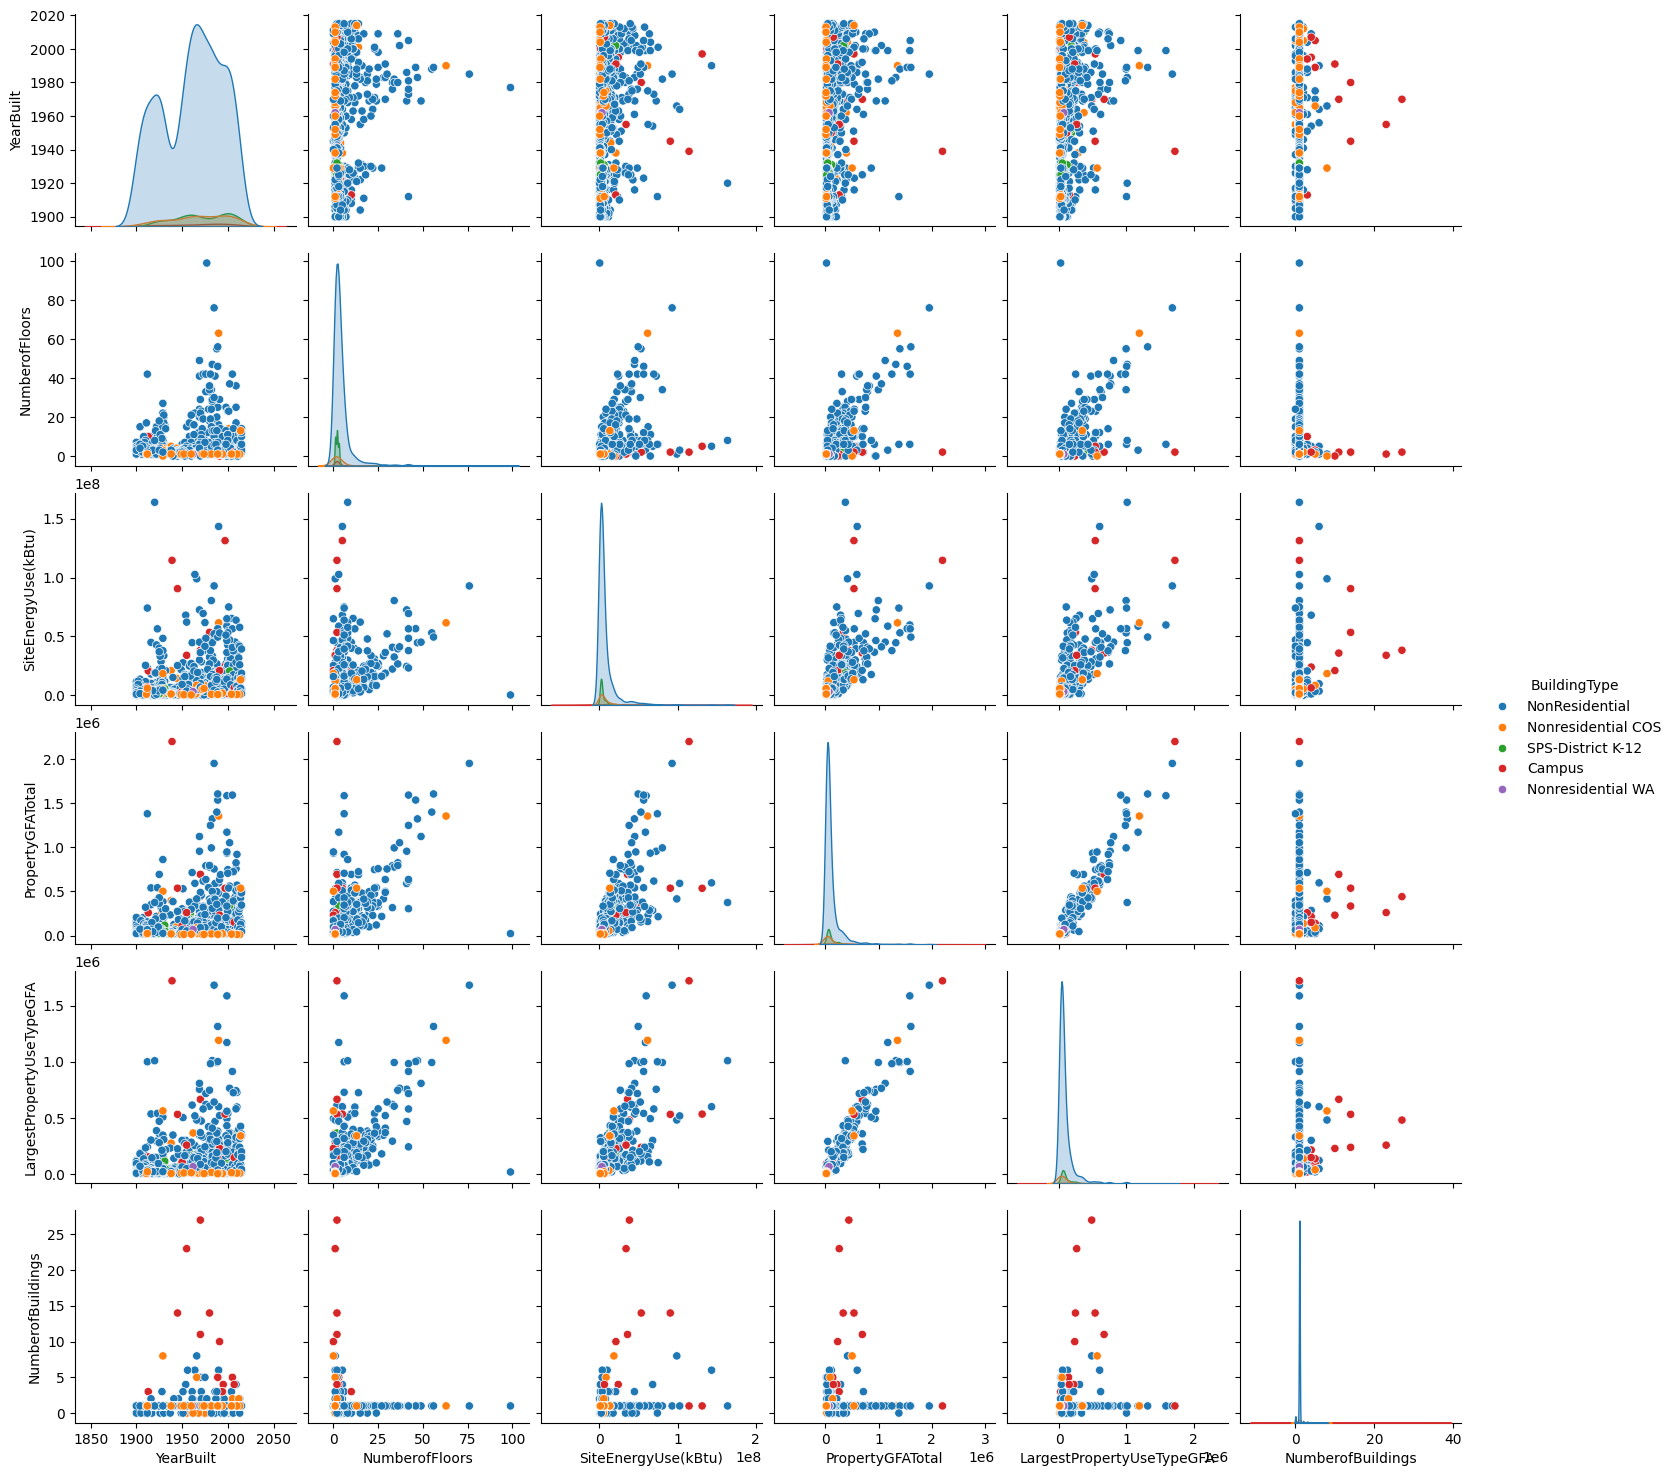

In [72]:
cols = [
    'YearBuilt', 'NumberofFloors', 'SiteEnergyUse(kBtu)','PropertyGFATotal','LargestPropertyUseTypeGFA','NumberofBuildings','BuildingType'
    ]
data_pairplot = building_clean[cols]

sns.pairplot(data_pairplot, hue = 'BuildingType'
)
plt.show()

#### Interprétation Pairplot 
Répartition temporelle (YearBuilt)
* Nonresidential (bleu clair, majoritaire) : présents sur toute la période, mais beaucoup construits entre 1920 et 2000.
* Nonresidential COS (orange) : plutôt construits après 1950, avec peu d’anciens bâtiments.
* Campus (rouge) : souvent parmi les plus récents ou très spécifiques, parfois extrêmes sur d’autres variables.

Nombre d’étages (NumberofFloors)
* Presque toutes les catégories restent < 10 étages.
* Campus (rouge) ont beaucoup de bâtiment mais pas forcément beaucoup d'étapes

Consommation énergétique (SiteEnergyUse(kBtu))
* Corrélation claire avec la surface totale, mais certains groupes consomment bien plus que d’autres pour une même surface
* Campus (rouge) → plusieurs gros consommateurs extrêmes.
* Nonresidential COS (orange) → généralement plus bas, consommation plus homogène.

Surface totale (PropertyGFATotal) et plus grand usage (LargestPropertyUseTypeGFA)
* Campus (rouge) → beaucoup de gros bâtiments.
* Nonresidential COS (orange) → plutôt taille moyenne.
* Nonresidential (bleu) → très variés, du petit au très grand.
Nombre de bâtiments (NumberofBuildings)
* La majorité des catégories ont 1 seul bâtiment.
* Les valeurs > 10 bâtiments sont quasi exclusivement Campus (rouge)

In [73]:
building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   DataYear                         1601 non-null   int64  
 2   BuildingType                     1601 non-null   object 
 3   PrimaryPropertyType              1601 non-null   object 
 4   ZipCode                          1601 non-null   object 
 5   CouncilDistrictCode              1601 non-null   int64  
 6   Neighborhood                     1601 non-null   object 
 7   Latitude                         1601 non-null   float64
 8   Longitude                        1601 non-null   float64
 9   YearBuilt                        1601 non-null   int64  
 10  NumberofBuildings                1601 non-null   float64
 11  NumberofFloors                   1601 non-null   int64  
 12  PropertyGFATotal         

#### On peut désormais supprimer la colonne Outlier et ComplianceStatus

In [74]:
elements_a_supprimer = ['ComplianceStatus','Outlier']
building_clean = building_clean.drop(columns = elements_a_supprimer)
building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   DataYear                         1601 non-null   int64  
 2   BuildingType                     1601 non-null   object 
 3   PrimaryPropertyType              1601 non-null   object 
 4   ZipCode                          1601 non-null   object 
 5   CouncilDistrictCode              1601 non-null   int64  
 6   Neighborhood                     1601 non-null   object 
 7   Latitude                         1601 non-null   float64
 8   Longitude                        1601 non-null   float64
 9   YearBuilt                        1601 non-null   int64  
 10  NumberofBuildings                1601 non-null   float64
 11  NumberofFloors                   1601 non-null   int64  
 12  PropertyGFATotal         

* Petit récapitulatif

In [75]:
building_clean_shape_six = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_quatre[0],'lignes et nous avons',building_clean_shape_quatre[1],'colonnes après la suppression de données identifiées comme non utilisables.')
print('Nous retrouvons',building_clean_shape_cinq[0],'lignes et nous avons',building_clean_shape_cinq[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_six[0],'lignes et nous avons',building_clean_shape_six[1],'colonnes après la suppression de colonnes non utilisées.')

print('Nous avons réduit notre jeu de',data_avant_transformation[0]-building_clean_shape_six[0],'lignes et de',data_avant_transformation[1]-building_clean_shape_six[1],'colonnes')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1623 lignes et nous avons 35 colonnes après la suppression de données identifiées comme non utilisables.
Nous retrouvons 1623 lignes et nous avons 27 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1601 lignes et nous avons 25 colonnes après la suppression de colonnes non utilisées.
Nous avons réduit notre jeu de 1775 lignes et de 21 colonnes


#### On peut désormais regarder la matrice de corrélation pour observer les relations entre nos variables

* Enregistrement des colonnes pertinentes pour la heatmap. On enlève notre target pour analyser nos variables entre elles.

In [76]:
col_corr = [
    'NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
    'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','YearBuilt'
    ]
df_correlation = building_clean[col_corr]

#### Création da la heatmap du coefficient de Spearman
* Nous ne sommes pas face à une distrbution normale, nous utilisons donc le coefficient de Spearman, qui est aussi plus robuste aux outliers que le coefficient de Pearson souvent utilisés pour les distributions linéaires.

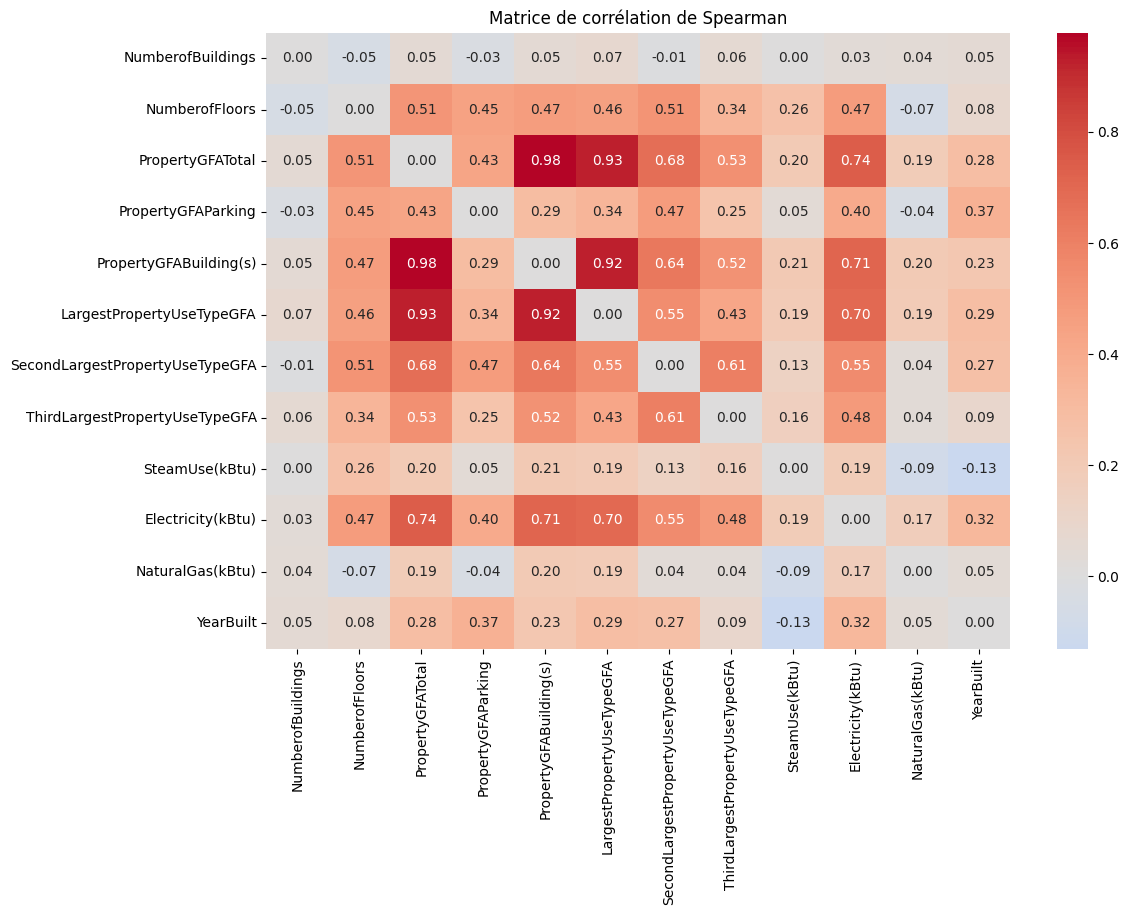

In [77]:
spearman_corr = df_correlation.corr(numeric_only=True, method='spearman')
np.fill_diagonal(spearman_corr.values, 0)
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Matrice de corrélation de Spearman")
plt.show()

#### On voit plusieurs catégories fortement correlées entre elles, comme :

* PropertyGFATotal
* PropertyGFABuilding(s)
* LargestPropertyUseTypeGFA

#### On peut supprimer LargestPropertyUseTypeGFA car elle est fortement correlés à deux varibales. Les autres on peut les garder pour la création de ratio.
#### On ne prend pas en compte SteamUse/Electricity et NaturalGas qui peuvent être sources de data leakage mais on les garde pour en créer des catégories dans les prochaines étapes.


#### On peut donc supprimer la colonne redondante.
#### On peut également enlever les colonnes dont nous n'avons pas l'utilité : ZipCode, CouncilDistrictCode, Latitude, Longitude

In [78]:
colonnes_a_enlever = ['ZipCode','CouncilDistrictCode','Latitude','Longitude','LargestPropertyUseTypeGFA']
building_clean = building_clean.drop(columns=colonnes_a_enlever)

In [80]:
building_clean_shape_sept = building_clean.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données et transformation.')
print('Nous retrouvons',building_clean_shape[0],'lignes et nous avons',building_clean_shape[1],'colonnes après la suppression de Multifamily.')
print('Nous retrouvons',building_clean_shape_deux[0],'lignes et nous avons',building_clean_shape_deux[1],'colonnes après la suppression des habitations en trop.')
print('Nous retrouvons',building_clean_shape_trois[0],'lignes et nous avons',building_clean_shape_trois[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_quatre[0],'lignes et nous avons',building_clean_shape_quatre[1],'colonnes après la suppression de données identifiées comme non utilisables.')
print('Nous retrouvons',building_clean_shape_cinq[0],'lignes et nous avons',building_clean_shape_cinq[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_six[0],'lignes et nous avons',building_clean_shape_six[1],'colonnes après la suppression de colonnes non utilisées.')
print('Nous retrouvons',building_clean_shape_sept[0],'lignes et nous avons',building_clean_shape_sept[1],'colonnes après la suppression de colonnes non utilisées.')


print('Nous avons réduit notre jeu de',data_avant_transformation[0]-building_clean_shape_sept[0],'lignes et de',data_avant_transformation[1]-building_clean_shape_sept[1],'colonnes')

Nous retrouvons 3376 lignes et nous avons 46 colonnes avant le nettoyage des données et transformation.
Nous retrouvons 1668 lignes et nous avons 46 colonnes après la suppression de Multifamily.
Nous retrouvons 1641 lignes et nous avons 46 colonnes après la suppression des habitations en trop.
Nous retrouvons 1641 lignes et nous avons 37 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1623 lignes et nous avons 35 colonnes après la suppression de données identifiées comme non utilisables.
Nous retrouvons 1623 lignes et nous avons 27 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1601 lignes et nous avons 25 colonnes après la suppression de colonnes non utilisées.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après la suppression de colonnes non utilisées.
Nous avons réduit notre jeu de 1775 lignes et de 26 colonnes


### Enregistrement du notebook de la première étape du projet 3

In [ ]:
building_clean.to_csv("Data/Projet_3_etape1_clean.csv", index=False)

* Scripts bien enregistrés dans le csv.

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

# Modélisation 

### Import des modules 

In [142]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [143]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [144]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [145]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE